In [1]:
#!pip install ..
!pip install emoji
import emoji

!pip list
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

!pip install seaborn
!pip install scikit-learn
!pip install optuna

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Package                   Version
------------------------- ----------------
ace_tools                 0.0
alembic                   1.15.2
anyio                     4.8.0
apturl                    0.5.2
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     25.1.0
babel                     2.17.0
bcrypt                    3.2.0
beautifulsoup4            4.13.3
bleach                    6.2.0
blinker                   1.4
Brlapi                    0.8.3
certifi                   2020.6.20
cffi                      1.17.1
chardet                   4.0.0
charset-normalizer        3.4.1
click                     8.0.3
colorama                  0.4.4
colorlog                  6.9.0
comm                      0.2.2
command-not-found         0.3
contourpy                 1.3.0
cryptogr

In [9]:
# =============================================================================
# 1. Chargement des données, prétraitement et vectorisation (TF-IDF)
# =============================================================================

df=pd.read_csv('scitweets_balanced.tsv', sep='\t')
display (df.head())

# Vérifier la présence de valeurs manquantes et les supprimer si nécessaire
df.dropna(subset=['text'], inplace=True)

# Sélectionner les colonnes nécessaires
X_text = df['text']  # Les tweets
y = df['science_related']  # Les labels (scientifique ou non)

# Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()  # Initialisation du vectorizer
X_tfidf = vectorizer.fit_transform(X_text)  # Transformation des tweets en vecteurs TF-IDF

# Afficher la forme de la matrice résultante
print("Taille de la matrice TF-IDF :", X_tfidf.shape)
#----------------------------------------------------------------------
# Conversion de la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un extrait de la matrice TF-IDF
print("Aperçu de la matrice TF-IDF (5 premières lignes) :")
display(tfidf_df.head())  # Utilisation de display() pour bien formater l'affichage dans Jupyter



# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['science_related'], test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0.0,3.166700e+17,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1.0,3.190909e+17,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2.0,3.220309e+17,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3.0,3.226948e+17,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4.0,3.285244e+17,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


Taille de la matrice TF-IDF : (1530, 7975)
Aperçu de la matrice TF-IDF (5 premières lignes) :


,000,01,049,07904567432a,093,0cmzimdaje,0hitnsx0c4,0iwaxgdpww,0jlkmseyhp,0oup8eayxh,...,ᴸᴼᵛᴱ,ᴼᴺ,ᴼᴼᴴ,ᵀᴴᴵˢ,ᵞᴼᵁ,ᶜᴴᴬᴿᴬᶜᵀᴱᴿ,逃げ恥,音樂,더쇼,런쥔을_공평하게_대하세요
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



======== Évaluation de base des modèles ========

🔍 Naive Bayes
✅ Accuracy: 0.8595
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.9231    0.7843    0.8481       153
           1     0.8125    0.9346    0.8693       153

    accuracy                         0.8595       306
   macro avg     0.8678    0.8595    0.8587       306
weighted avg     0.8678    0.8595    0.8587       306



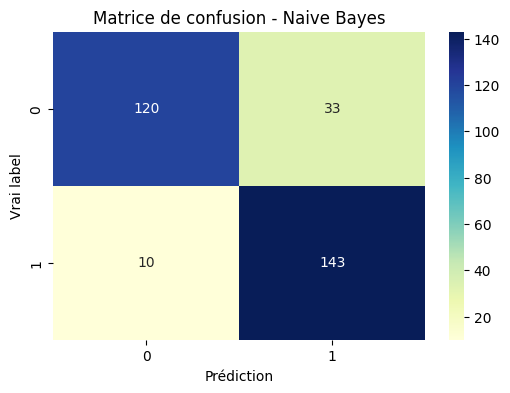


🔍 Decision Tree
✅ Accuracy: 0.8235
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8322    0.8105    0.8212       153
           1     0.8153    0.8366    0.8258       153

    accuracy                         0.8235       306
   macro avg     0.8238    0.8235    0.8235       306
weighted avg     0.8238    0.8235    0.8235       306



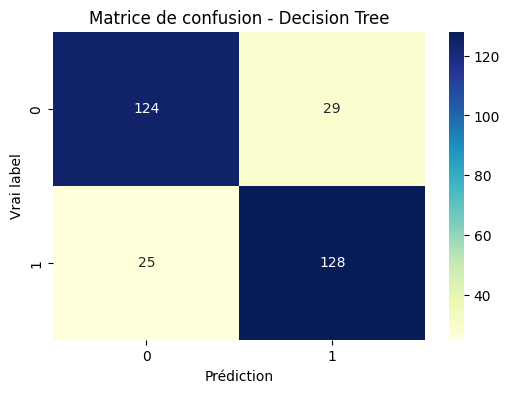


🔍 SVM
✅ Accuracy: 0.8954
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8712    0.9281    0.8987       153
           1     0.9231    0.8627    0.8919       153

    accuracy                         0.8954       306
   macro avg     0.8971    0.8954    0.8953       306
weighted avg     0.8971    0.8954    0.8953       306



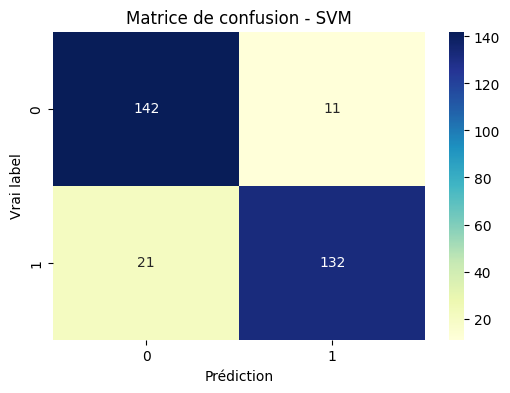


🔍 K-NN
✅ Accuracy: 0.7386
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7704    0.6797    0.7222       153
           1     0.7135    0.7974    0.7531       153

    accuracy                         0.7386       306
   macro avg     0.7419    0.7386    0.7377       306
weighted avg     0.7419    0.7386    0.7377       306



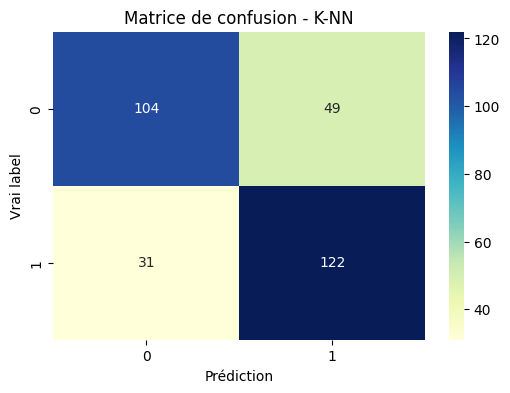


🔍 Random Forest
✅ Accuracy: 0.8856
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8391    0.9542    0.8930       153
           1     0.9470    0.8170    0.8772       153

    accuracy                         0.8856       306
   macro avg     0.8930    0.8856    0.8851       306
weighted avg     0.8930    0.8856    0.8851       306



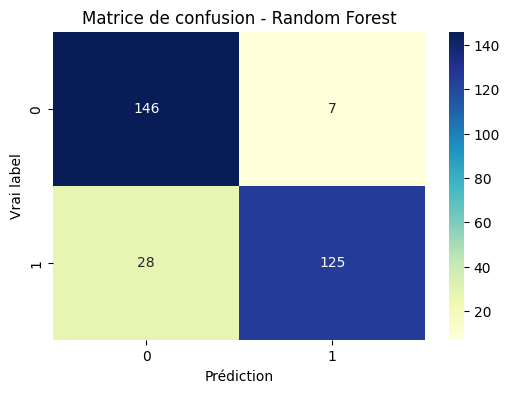


🔍 XGBoost


/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:51:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8725
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8750    0.8693    0.8721       153
           1     0.8701    0.8758    0.8730       153

    accuracy                         0.8725       306
   macro avg     0.8726    0.8725    0.8725       306
weighted avg     0.8726    0.8725    0.8725       306



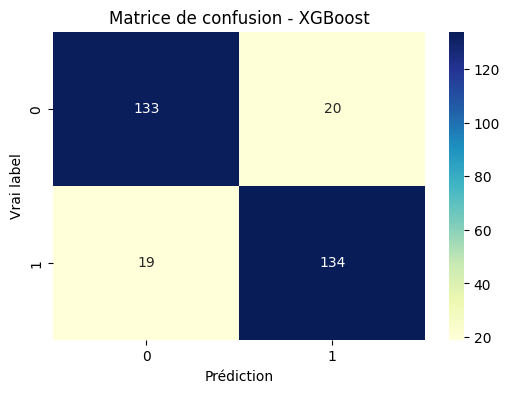


🔍 Neural Network - MLP
✅ Accuracy: 0.9020
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8820    0.9281    0.9045       153
           1     0.9241    0.8758    0.8993       153

    accuracy                         0.9020       306
   macro avg     0.9031    0.9020    0.9019       306
weighted avg     0.9031    0.9020    0.9019       306



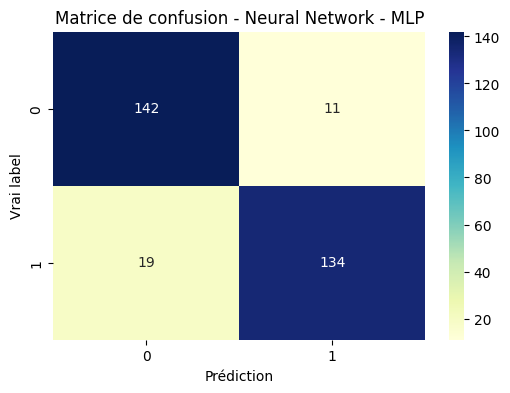

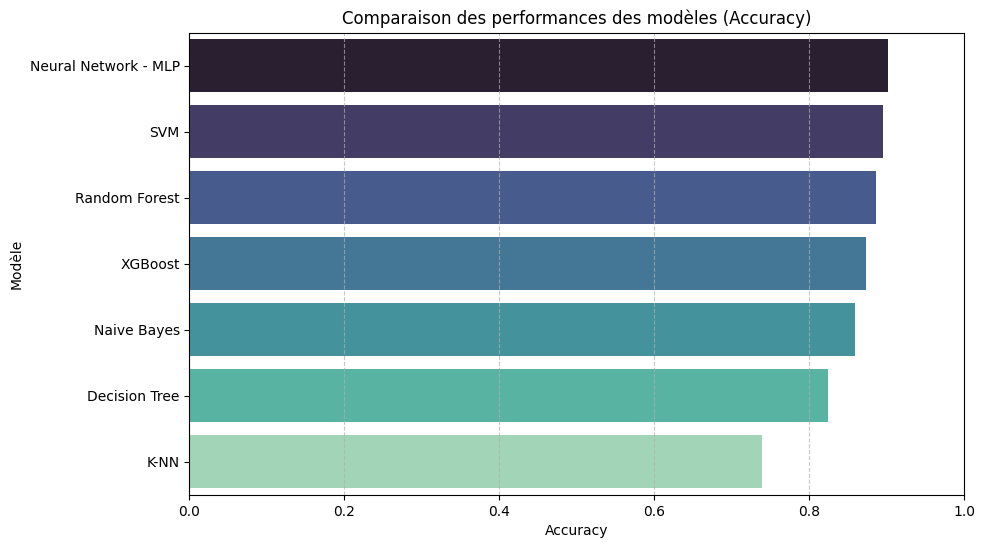

In [11]:
# =============================================================================
# 2. Évaluation de base des modèles de classification
# =============================================================================

# Import des classifieurs
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Fonction de tracé de la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
    plt.xlabel("Prédiction")
    plt.ylabel("Vrai label")
    plt.title(f"Matrice de confusion - {title}")
    plt.show()

# Dictionnaire des modèles de base
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": LinearSVC(max_iter=10000),
    "K-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network - MLP": MLPClassifier(max_iter=500)
}

results = []

print("\n======== Évaluation de base des modèles ========")
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    print(f"✅ Accuracy: {acc:.4f}")
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Pour tracer la matrice de confusion, on récupère l'ensemble des labels présents
    plot_confusion_matrix(y_test, y_pred, labels=np.unique(y), title=name)

# Comparaison graphique des performances
results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy"])
results_df = results_df.sort_values("Accuracy", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy", y="Modèle", palette="mako")
plt.title("Comparaison des performances des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
on va optuner tout les models pour savoir le quel est le mieux a bfaire cette aprem

In [12]:
# =============================================================================
# 3. Optimisation des hyperparamètres avec Optuna pour chaque modèle
# =============================================================================

import optuna

# --- Objectif pour Naive Bayes ---
def objective_nb(trial):
    alpha = trial.suggest_float("alpha", 1e-3, 1.0, log=True)
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_nb = optuna.create_study(direction="maximize")
study_nb.optimize(objective_nb, n_trials=50)
print("\n=== Résultats Optuna pour Naive Bayes ===")
print("Meilleurs paramètres:", study_nb.best_params)
print("Meilleure accuracy obtenue:", study_nb.best_value)

# --- Objectif pour Decision Tree ---
def objective_dt(trial):
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective_dt, n_trials=50)
print("\n=== Résultats Optuna pour Decision Tree ===")
print("Meilleurs paramètres:", study_dt.best_params)
print("Meilleure accuracy obtenue:", study_dt.best_value)

# --- Objectif pour SVM (LinearSVC) ---
def objective_svm(trial):
    C = trial.suggest_float("C", 1e-3, 1e2, log=True)
    model = LinearSVC(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(objective_svm, n_trials=50)
print("\n=== Résultats Optuna pour SVM ===")
print("Meilleurs paramètres:", study_svm.best_params)
print("Meilleure accuracy obtenue:", study_svm.best_value)

# --- Objectif pour K-NN ---
def objective_knn(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 1, 30)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective_knn, n_trials=50)
print("\n=== Résultats Optuna pour K-NN ===")
print("Meilleurs paramètres:", study_knn.best_params)
print("Meilleure accuracy obtenue:", study_knn.best_value)

# --- Objectif pour Random Forest ---
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)
print("\n=== Résultats Optuna pour Random Forest ===")
print("Meilleurs paramètres:", study_rf.best_params)
print("Meilleure accuracy obtenue:", study_rf.best_value)

# --- Objectif pour XGBoost ---
def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)
print("\n=== Résultats Optuna pour XGBoost ===")
print("Meilleurs paramètres:", study_xgb.best_params)
print("Meilleure accuracy obtenue:", study_xgb.best_value)

# --- Objectif pour Neural Network (MLP) ---
def objective_mlp(trial):
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (50, 50), (100, 50)])
    learning_rate_init = trial.suggest_float("learning_rate_init", 1e-4, 1e-1, log=True)
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_mlp = optuna.create_study(direction="maximize")
study_mlp.optimize(objective_mlp, n_trials=50)
print("\n=== Résultats Optuna pour Neural Network (MLP) ===")
print("Meilleurs paramètres:", study_mlp.best_params)
print("Meilleure accuracy obtenue:", study_mlp.best_value)

[I 2025-04-15 13:21:29,293] A new study created in memory with name: no-name-8ac115c1-c0cc-4d7d-af88-589dd8280abf
[I 2025-04-15 13:21:29,297] Trial 0 finished with value: 0.8921568627450981 and parameters: {'alpha': 0.010612743925074185}. Best is trial 0 with value: 0.8921568627450981.
[I 2025-04-15 13:21:29,299] Trial 1 finished with value: 0.8954248366013072 and parameters: {'alpha': 0.06092335286610457}. Best is trial 1 with value: 0.8954248366013072.
[I 2025-04-15 13:21:29,301] Trial 2 finished with value: 0.8888888888888888 and parameters: {'alpha': 0.004240629043637003}. Best is trial 1 with value: 0.8954248366013072.
[I 2025-04-15 13:21:29,303] Trial 3 finished with value: 0.8888888888888888 and parameters: {'alpha': 0.002004361938233329}. Best is trial 1 with value: 0.8954248366013072.
[I 2025-04-15 13:21:29,305] Trial 4 finished with value: 0.8921568627450981 and parameters: {'alpha': 0.011640736228720347}. Best is trial 1 with value: 0.8954248366013072.
[I 2025-04-15 13:21:29


=== Résultats Optuna pour Naive Bayes ===
Meilleurs paramètres: {'alpha': 0.06092335286610457}
Meilleure accuracy obtenue: 0.8954248366013072


[I 2025-04-15 13:21:29,764] Trial 5 finished with value: 0.738562091503268 and parameters: {'max_depth': 8, 'min_samples_split': 14}. Best is trial 1 with value: 0.8006535947712419.
[I 2025-04-15 13:21:29,806] Trial 6 finished with value: 0.7745098039215687 and parameters: {'max_depth': 13, 'min_samples_split': 12}. Best is trial 1 with value: 0.8006535947712419.
[I 2025-04-15 13:21:29,856] Trial 7 finished with value: 0.803921568627451 and parameters: {'max_depth': 18, 'min_samples_split': 15}. Best is trial 7 with value: 0.803921568627451.
[I 2025-04-15 13:21:29,898] Trial 8 finished with value: 0.7581699346405228 and parameters: {'max_depth': 13, 'min_samples_split': 16}. Best is trial 7 with value: 0.803921568627451.
[I 2025-04-15 13:21:29,934] Trial 9 finished with value: 0.7777777777777778 and parameters: {'max_depth': 10, 'min_samples_split': 9}. Best is trial 7 with value: 0.803921568627451.
[I 2025-04-15 13:21:29,952] Trial 10 finished with value: 0.7222222222222222 and parame


=== Résultats Optuna pour Decision Tree ===
Meilleurs paramètres: {'max_depth': 18, 'min_samples_split': 3}
Meilleure accuracy obtenue: 0.826797385620915


[I 2025-04-15 13:21:32,209] Trial 21 finished with value: 0.9052287581699346 and parameters: {'C': 0.4487922805900036}. Best is trial 11 with value: 0.9084967320261438.
[I 2025-04-15 13:21:32,214] Trial 22 finished with value: 0.9019607843137255 and parameters: {'C': 0.28597255690131523}. Best is trial 11 with value: 0.9084967320261438.
[I 2025-04-15 13:21:32,218] Trial 23 finished with value: 0.8562091503267973 and parameters: {'C': 0.025501089819545113}. Best is trial 11 with value: 0.9084967320261438.
[I 2025-04-15 13:21:32,229] Trial 24 finished with value: 0.8954248366013072 and parameters: {'C': 4.2712464961012255}. Best is trial 11 with value: 0.9084967320261438.
[I 2025-04-15 13:21:32,234] Trial 25 finished with value: 0.8986928104575164 and parameters: {'C': 0.7203577607129771}. Best is trial 11 with value: 0.9084967320261438.
[I 2025-04-15 13:21:32,254] Trial 26 finished with value: 0.8954248366013072 and parameters: {'C': 16.620624041865284}. Best is trial 11 with value: 0.9


=== Résultats Optuna pour SVM ===
Meilleurs paramètres: {'C': 0.3930993153048922}
Meilleure accuracy obtenue: 0.9084967320261438


[I 2025-04-15 13:21:32,596] Trial 19 finished with value: 0.8006535947712419 and parameters: {'n_neighbors': 26}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,607] Trial 20 finished with value: 0.8071895424836601 and parameters: {'n_neighbors': 17}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,619] Trial 21 finished with value: 0.8202614379084967 and parameters: {'n_neighbors': 30}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,631] Trial 22 finished with value: 0.803921568627451 and parameters: {'n_neighbors': 27}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,642] Trial 23 finished with value: 0.7777777777777778 and parameters: {'n_neighbors': 23}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,654] Trial 24 finished with value: 0.8202614379084967 and parameters: {'n_neighbors': 30}. Best is trial 11 with value: 0.8202614379084967.
[I 2025-04-15 13:21:32,


=== Résultats Optuna pour K-NN ===
Meilleurs paramètres: {'n_neighbors': 30}
Meilleure accuracy obtenue: 0.8202614379084967


[I 2025-04-15 13:21:33,229] Trial 0 finished with value: 0.869281045751634 and parameters: {'n_estimators': 145, 'max_depth': 13}. Best is trial 0 with value: 0.869281045751634.
[I 2025-04-15 13:21:33,454] Trial 1 finished with value: 0.8529411764705882 and parameters: {'n_estimators': 148, 'max_depth': 9}. Best is trial 0 with value: 0.869281045751634.
[I 2025-04-15 13:21:33,724] Trial 2 finished with value: 0.869281045751634 and parameters: {'n_estimators': 207, 'max_depth': 7}. Best is trial 0 with value: 0.869281045751634.
[I 2025-04-15 13:21:33,838] Trial 3 finished with value: 0.8627450980392157 and parameters: {'n_estimators': 86, 'max_depth': 7}. Best is trial 0 with value: 0.869281045751634.
[I 2025-04-15 13:21:34,432] Trial 4 finished with value: 0.8594771241830066 and parameters: {'n_estimators': 265, 'max_depth': 16}. Best is trial 0 with value: 0.869281045751634.
[I 2025-04-15 13:21:34,619] Trial 5 finished with value: 0.8431372549019608 and parameters: {'n_estimators': 11


=== Résultats Optuna pour Random Forest ===
Meilleurs paramètres: {'n_estimators': 162, 'max_depth': 18}
Meilleure accuracy obtenue: 0.8888888888888888


[I 2025-04-15 13:21:55,337] Trial 0 finished with value: 0.8104575163398693 and parameters: {'n_estimators': 177, 'max_depth': 5, 'learning_rate': 0.02531392090395753, 'subsample': 0.835620223355241, 'colsample_bytree': 0.7859607373249182}. Best is trial 0 with value: 0.8104575163398693.
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-04-15 13:21:55,719] Trial 1 finished with value: 0.8823529411764706 and parameters: {'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.1053621086753481, 'subsample': 0.9385762915226268, 'colsample_bytree': 0.6635089992818572}. Best is trial 1 with value: 0.8823529411764706.
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sm


=== Résultats Optuna pour XGBoost ===
Meilleurs paramètres: {'n_estimators': 51, 'max_depth': 11, 'learning_rate': 0.14977477219565016, 'subsample': 0.9583996871294135, 'colsample_bytree': 0.6520841795708084}
Meilleure accuracy obtenue: 0.8888888888888888


[I 2025-04-15 13:22:31,453] Trial 0 finished with value: 0.9019607843137255 and parameters: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.021004943117787233}. Best is trial 0 with value: 0.9019607843137255.
/home/nina/.local/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/home/nina/.local/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/home/nina/.local/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type


=== Résultats Optuna pour Neural Network (MLP) ===
Meilleurs paramètres: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.02844346281996083}
Meilleure accuracy obtenue: 0.9150326797385621
